# Laboratorio 2

## 1. Carga de datos

In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:
df = pd.read_csv('./data/MotorAlpes_data.csv', index_col=False)
df = df.iloc[:, 1:]

## 2. Descripción de los datos

In [3]:
df.shape

(7115, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6876 non-null   float64
 1   km_driven      6917 non-null   float64
 2   owner          6876 non-null   object 
 3   seller_type    7115 non-null   object 
 4   seats          7115 non-null   float64
 5   fuel           7115 non-null   object 
 6   transmission   7115 non-null   object 
 7   mileage        6917 non-null   float64
 8   engine         6835 non-null   float64
 9   max_power      6847 non-null   float64
 10  selling_price  6714 non-null   float64
dtypes: float64(7), object(4)
memory usage: 611.6+ KB


,year,km_driven,owner,seller_type,seats,fuel,transmission,mileage,engine,max_power,selling_price
0,NaN,145500.0,NaN,Individual,5.0,Diesel,Manual,23.40,1248.0,74.00,5451.90
1,2014.0,120000.0,Second Owner,Individual,5.0,Diesel,Manual,21.14,1498.0,103.52,4482.68
2,2006.0,140000.0,Third Owner,Individual,5.0,Petrol,Manual,17.70,13524.0,78.00,1914.22
3,2010.0,127000.0,First Owner,Individual,5.0,Diesel,Manual,23.00,NaN,NaN,2725.95
4,2007.0,120000.0,First Owner,Individual,5.0,Petrol,Manual,16.10,1298.0,88.20,1574.99
...,...,...,...,...,...,...,...,...,...,...,...
7110,2013.0,110000.0,First Owner,Individual,5.0,Petrol,Manual,18.50,NaN,1525.41,3876.91
7111,2007.0,119000.0,Fourth & Above Owner,Individual,5.0,Diesel,Manual,16.80,1493.0,110.00,1635.57
7112,2009.0,120000.0,First Owner,Individual,5.0,Diesel,Manual,19.30,1248.0,73.90,4628.06
7113,2013.0,25000.0,First Owner,Individual,5.0,Diesel,Manual,23.57,1396.0,70.00,3513.45


In [5]:
df.describe()

,year,km_driven,seats,mileage,engine,max_power,selling_price
count,6876.000000,6.917000e+03,7115.000000,6917.000000,6835.000000,6847.000000,6714.000000
mean,2013.980948,6.911118e+04,5.411103,19.523473,1835.489539,141.981595,11261.208041
std,3.852565,5.796521e+04,0.953555,4.241574,2363.919253,274.956684,40765.694516
min,1994.000000,1.000000e+00,2.000000,0.000000,4.000000,1.070000,1.910000
25%,2012.000000,3.400000e+04,5.000000,16.800000,1197.000000,68.050000,3210.560000
50%,2015.000000,6.000000e+04,5.000000,19.330000,1248.000000,83.100000,5451.900000
75%,2017.000000,9.400000e+04,5.000000,22.320000,1597.000000,104.680000,8480.740000
max,2020.000000,2.360457e+06,14.000000,46.816000,19972.000000,1995.640000,598983.440000


### 2.1 Completitud

In [6]:
df.isnull().sum()    

year             239
km_driven        198
owner            239
seller_type        0
seats              0
fuel               0
transmission       0
mileage          198
engine           280
max_power        268
selling_price    401
dtype: int64

In [7]:
# Show null values as a percentage of the dataframe
df.isnull().sum() / df.shape[0]

year             0.033591
km_driven        0.027829
owner            0.033591
seller_type      0.000000
seats            0.000000
fuel             0.000000
transmission     0.000000
mileage          0.027829
engine           0.039353
max_power        0.037667
selling_price    0.056360
dtype: float64

### 2.2 Consistencia

In [8]:
# check if year is between 1994 and 2020

print(all(map(lambda x: x in range(1994,2021), df["year"])))

False


In [9]:
# check if km_driven is between 1 and 2’360.457

print(all(map(lambda x: x in range(1,2360458), df["km_driven"])))

False


In [10]:
# check if owner is in ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']

print(all(map(lambda x: x in ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'], df["owner"])))

False


In [11]:
# check if seller_type is in ['Individual', 'Dealer', 'Trustmark Dealer']

print(all(map(lambda x: x in ['Individual', 'Dealer', 'Trustmark Dealer'], df["seller_type"])))

True


In [12]:
# check if seats is between 2 and 14

print(all(map(lambda x: x in range(2,15), df["seats"])))

True


In [13]:
# check if fuel is in ['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric']

print(all(map(lambda x: x in ['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], df["fuel"])))

True


In [14]:
# check if transmission is in ['Manual', 'Automatic']

print(all(map(lambda x: x in ['Manual', 'Automatic'], df["transmission"])))

True


In [15]:
# check if mileage is between 0 and 46.816

print(all(map(lambda x: 34.2 <= x <= 46.816, df["mileage"])))

False


In [16]:
# check if engine is between 624 and 3604

print(all(map(lambda x: x in range(624,3605), df["engine"])))

False


In [17]:
# check if max_power is between 34.2 and 400

print(all(map(lambda x: 32.8 <= x <= 400, df["max_power"])))

False


In [18]:
# check if selling_price is between 363.45 and 121153.38

print(all(map(lambda x: 363.45 <= x <= 121153.38, df["selling_price"])))

False


### 2.3 Consistencia

In [19]:
# for every categorical variable, check if there are values that are not in the list of possible values

categorical = ['owner', 'seller_type', 'fuel', 'transmission']

for col in categorical:
    print(col, df[col].unique())

owner [nan 'Second Owner' 'Third Owner' 'First Owner' 'Fourth & Above Owner'
 'Test Drive Car']
seller_type ['Individual' 'Dealer' 'Trustmark Dealer']
fuel ['Diesel' 'Petrol' 'LPG' 'CNG']
transmission ['Manual' 'Automatic']


## 3. Análisis Exploratorio

### 3.1 Preparación de los datos

In [20]:
# Fill numerical values with the median so as not to skew the data
df = df.fillna(df.median())

/var/folders/7y/s678cmw965v15n9dxxzzvrjh0000gn/T/ipykernel_77838/1869067488.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [21]:
# Fill categorical values with the mode
categorical_cols = ['owner', 'seller_type', 'fuel', 'transmission']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [22]:
# Replace all the categorical values with numbers
df['owner'] = df['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})
df['seller_type'] = df['seller_type'].replace({'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3})
df['fuel'] = df['fuel'].replace({'Petrol': 1, 'Diesel': 2, 'CNG': 3, 'LPG': 4, 'Electric': 5})
df['transmission'] = df['transmission'].replace({'Manual': 1, 'Automatic': 2})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7115 non-null   float64
 1   km_driven      7115 non-null   float64
 2   owner          7115 non-null   int64  
 3   seller_type    7115 non-null   int64  
 4   seats          7115 non-null   float64
 5   fuel           7115 non-null   int64  
 6   transmission   7115 non-null   int64  
 7   mileage        7115 non-null   float64
 8   engine         7115 non-null   float64
 9   max_power      7115 non-null   float64
 10  selling_price  7115 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 611.6 KB


In [23]:
# Drop all null values
#df = df.dropna()

In [24]:
# Replace the "year" column values to int
df['year'] = df['year'].astype(int)

### 3.2 Visualización de los datos

In [25]:
#sns.pairplot(df)
#plt.show()

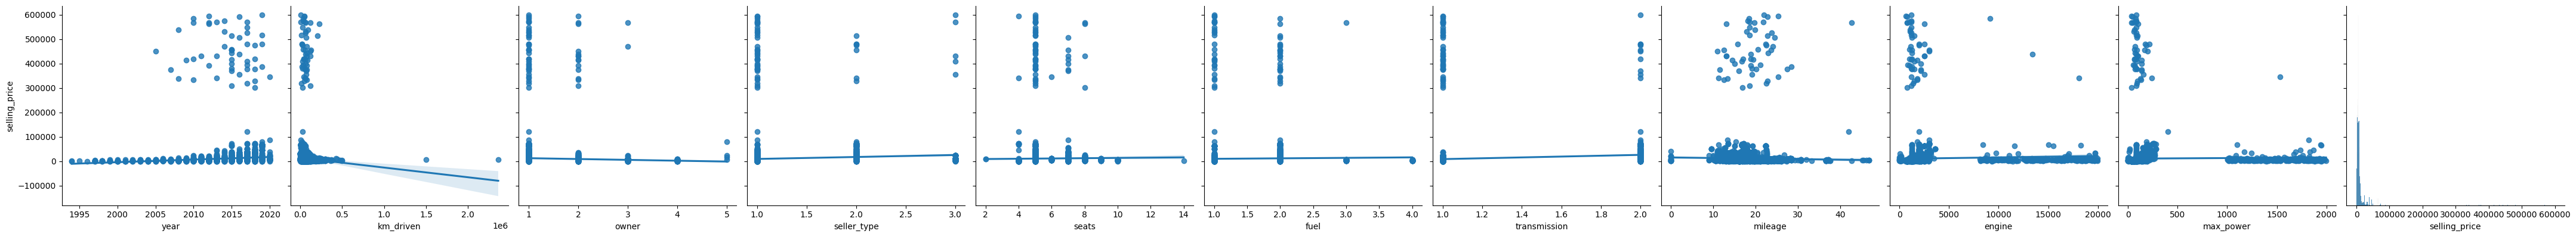

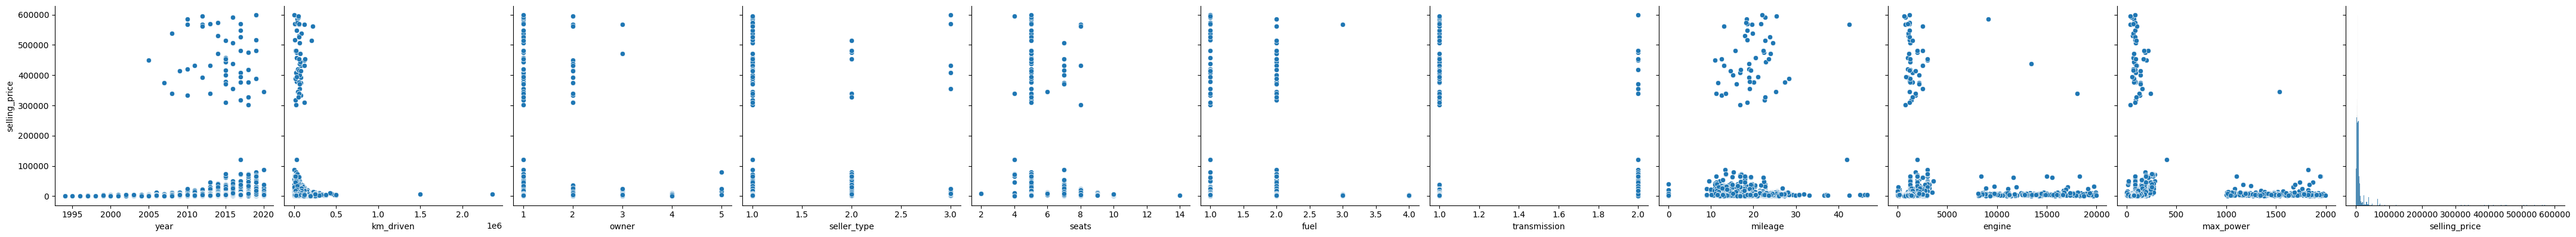

In [26]:
sns.pairplot(df, x_vars=list(df.columns), y_vars='selling_price', height=4, aspect=1, kind='reg')
sns.pairplot(df, x_vars=list(df.columns), y_vars='selling_price', height=4, aspect=1)

In [27]:
df[df.columns].corr()

,year,km_driven,owner,seller_type,seats,fuel,transmission,mileage,engine,max_power,selling_price
year,1.000000,-0.412650,-0.502027,0.225107,-0.013623,0.018283,0.239609,0.302464,-0.000984,0.053672,0.102322
km_driven,-0.412650,1.000000,0.272349,-0.186182,0.224160,0.253972,-0.192115,-0.165369,0.036352,-0.007598,-0.057280
owner,-0.502027,0.272349,1.000000,-0.194310,0.031028,0.026383,-0.136136,-0.158425,0.013222,-0.016258,-0.061113
seller_type,0.225107,-0.186182,-0.194310,1.000000,-0.074117,-0.071734,0.351991,-0.029998,0.037357,0.022361,0.095998
seats,-0.013623,0.224160,0.031028,-0.074117,1.000000,0.305467,-0.073186,-0.433434,0.114350,0.022073,0.013726
fuel,0.018283,0.253972,0.026383,-0.071734,0.305467,1.000000,-0.041470,0.149097,0.097047,0.037757,0.026568
transmission,0.239609,-0.192115,-0.136136,0.351991,-0.073186,-0.041470,1.000000,-0.179777,0.053886,0.072900,0.149686
mileage,0.302464,-0.165369,-0.158425,-0.029998,-0.433434,0.149097,-0.179777,1.000000,-0.113753,-0.036024,-0.024487
engine,-0.000984,0.036352,0.013222,0.037357,0.114350,0.097047,0.053886,-0.113753,1.000000,-0.001063,0.033458
max_power,0.053672,-0.007598,-0.016258,0.022361,0.022073,0.037757,0.072900,-0.036024,-0.001063,1.000000,0.015804


In [28]:
# Asumimos que el experto decidio que estos eran los features mas relevantes
features_avec_year = ["year", "km_driven", "seats", "fuel", "transmission", "max_power"]
features = ["km_driven", "seats", "fuel", "transmission", "max_power"]
#TODO: justificar atributos

In [29]:
# Correlation between features chosen
df[features].corr()

,km_driven,seats,fuel,transmission,max_power
km_driven,1.000000,0.224160,0.253972,-0.192115,-0.007598
seats,0.224160,1.000000,0.305467,-0.073186,0.022073
fuel,0.253972,0.305467,1.000000,-0.041470,0.037757
transmission,-0.192115,-0.073186,-0.041470,1.000000,0.072900
max_power,-0.007598,0.022073,0.037757,0.072900,1.000000


## 4. Modelamiento

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df['selling_price'], test_size = 0.3, random_state = 1)

In [31]:
x_train

,km_driven,seats,fuel,transmission,max_power
1839,120000.0,7.0,2,1,63.00
1019,175000.0,5.0,2,1,69.00
6009,5000.0,5.0,1,1,53.30
1891,48000.0,5.0,1,1,67.10
3477,129000.0,7.0,2,1,140.00
...,...,...,...,...,...
905,70000.0,5.0,1,1,68.05
5192,32000.0,5.0,2,1,88.50
3980,40000.0,5.0,2,1,97.90
235,193000.0,5.0,2,1,73.90


In [32]:
x_test

,km_driven,seats,fuel,transmission,max_power
5930,146000.0,5.0,2,1,126.32
2441,32000.0,5.0,1,1,81.80
5028,50000.0,7.0,2,1,140.00
1564,5000.0,5.0,1,1,81.80
5213,120000.0,7.0,2,1,88.50
...,...,...,...,...,...
5477,97000.0,5.0,4,1,68.10
643,60000.0,5.0,2,1,88.80
6643,97000.0,5.0,2,1,74.00
2188,10000.0,5.0,1,1,67.05


In [33]:
y_train

1839     5451.90
1019     2423.07
6009     3452.87
1891     3053.07
3477     7208.63
          ...   
905      3755.75
5192     8359.58
3980    14538.41
235      3876.91
5157    12721.10
Name: selling_price, Length: 4980, dtype: float64

In [34]:
y_test

5930    5633.63
2441    6057.67
5028    9086.50
1564    6663.44
5213    9571.12
         ...   
5477    5451.90
643     4240.37
6643    4543.25
2188    4834.02
4966     605.77
Name: selling_price, Length: 2135, dtype: float64

In [35]:
x_train.shape, y_train.shape

((4980, 5), (4980,))

In [36]:
x_test.shape, y_test.shape

((2135, 5), (2135,))

### 4.1. Regresion

In [37]:
regression = LinearRegression()

In [38]:
regression.fit(x_train, y_train)

LinearRegression()

In [39]:
regression.intercept_

-13709.632211112754

In [40]:
pd.DataFrame({'columns': features, 'coef': regression.coef_})

,columns,coef
0,km_driven,-0.031604
1,seats,847.520773
2,fuel,2683.227347
3,transmission,15910.998055
4,max_power,0.224899


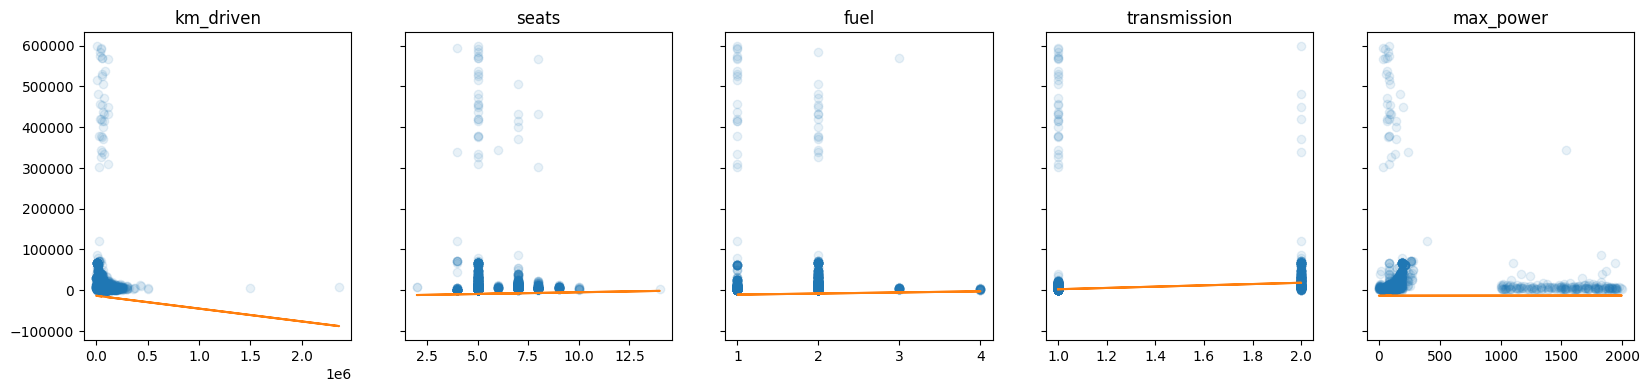

In [41]:
f, axs = plt.subplots(1, len(features), sharey = True, figsize = (20, 4))

for i in range(len(features)):
    col = features[i]
    x = x_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, 'o', alpha = 0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)